In [ ]:
import cv2
from matplotlib import pyplot as plt

print(cv2.__version__)

def showGray(mat) :
    mat_color = cv2.cvtColor(mat, cv2.COLOR_GRAY2RGB)
    mat_show = mat_color[:,:,::-1]
    plt.figure(figsize=(10,10))
    plt.imshow(mat_show)

def showColor(mat) :
    mat_show = mat[:,:,::-1]
    plt.figure(figsize=(10,10))
    plt.imshow(mat_show)

4.5.4-dev


# 绘制标定板

## 棋盘格

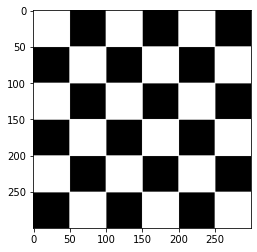

In [ ]:
import numpy as np
chessboard = np.zeros((300, 300), np.uint8)
for i in range(3):
    for j in range(3):
        cv2.rectangle(chessboard, (100 * i, 100 * j), (100 * i + 50, 100 * j + 50), 255, -1)
        cv2.rectangle(chessboard, (100 * i + 50, 100 * j + 50), (100 * i + 100, 100 * j + 100), 255, -1)
showGray(chessboard)
chessboard3 = cv2.cvtColor(chessboard, cv2.COLOR_GRAY2RGB)

In [ ]:
ret, corners = cv2.findChessboardCorners(chessboard, (5,5), None)
ret

True

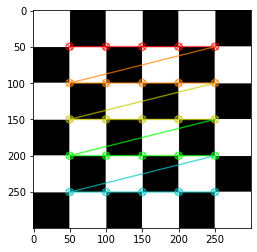

In [ ]:
cv2.drawChessboardCorners(chessboard3, (5,5), corners, ret)
showColor(chessboard3)

In [ ]:
objp = np.zeros((5*5,3), np.float32)
objp[:,:2] = np.mgrid[0:5,0:5].T.reshape(-1,2)

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], chessboard.shape[::-1], None, None)
ret

0.0023046419712968815

In [ ]:
ret, rvec, tvec = cv2.solvePnP(objp, corners, mtx, dist)
ret

True

## 圆点

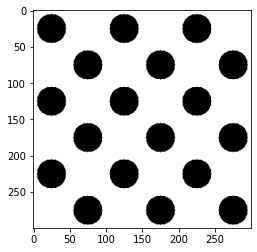

In [ ]:
import numpy as np
circlegrid = np.zeros((300, 300), np.uint8)
for i in range(3):
    for j in range(3):
        cv2.circle(circlegrid, (100 * i + 25, 100 * j + 25), 20, 255, -1)
        cv2.circle(circlegrid, (100 * i + 75, 100 * j + 75), 20, 255, -1)
circlegrid = 255 - circlegrid
showGray(circlegrid)
circlegrid3 = cv2.cvtColor(circlegrid, cv2.COLOR_GRAY2RGB)

In [ ]:
param = cv2.SimpleBlobDetector_Params()
param.minArea = 10
param.maxArea = 2500
param.minDistBetweenBlobs = 5
blob = cv2.SimpleBlobDetector_create(param)
ret, corners = cv2.findCirclesGrid(circlegrid, (3,6), cv2.CALIB_CB_ASYMMETRIC_GRID, blob, None)
ret
# CALIB_CB_ASYMMETRIC_GRID CALIB_CB_SYMMETRIC_GRID

True

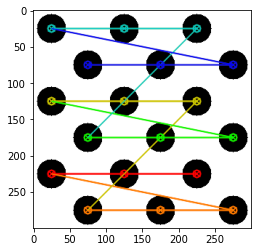

In [ ]:
cv2.drawChessboardCorners(circlegrid3, (3,6), corners, ret)
showColor(circlegrid3)

# 拍摄标定板

In [ ]:
color = cv2.imread("/work/uoogou/chessboard_1_d45.jpg", cv2.IMREAD_COLOR)
color.shape

(1728, 3072, 3)

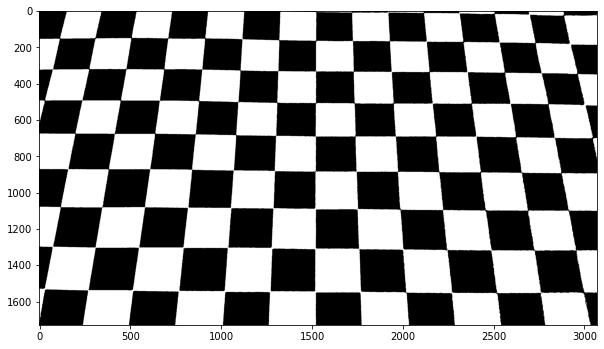

In [ ]:
# img = cv2.resize(color, (int(3072/4), int(1728/4)))
img2 = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
ret, thresh1 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
showGray(thresh1)

In [ ]:
ret, corners = cv2.findChessboardCornersSB(thresh1, (7,7))
ret

True

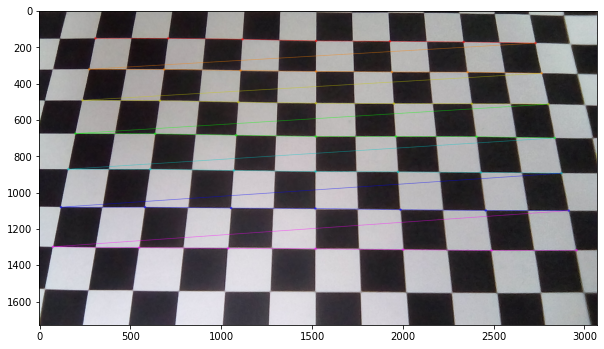

In [ ]:
cv2.drawChessboardCorners(color, (7,7), corners, ret)
showColor(color)

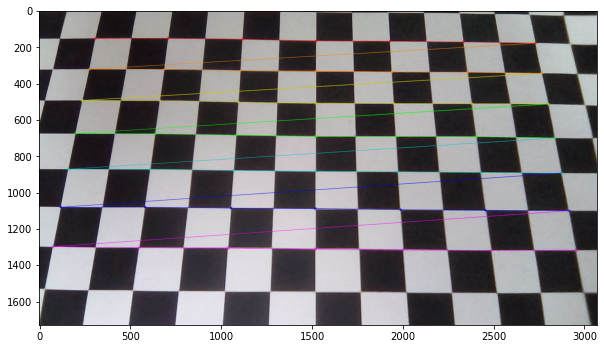

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
corners2 = cv2.cornerSubPix(img2,corners, (7,7), (-1,-1), criteria)
cv2.drawChessboardCorners(color, (7,7), corners2, ret)
showColor(color)

In [ ]:
corners2.shape

(49, 1, 2)

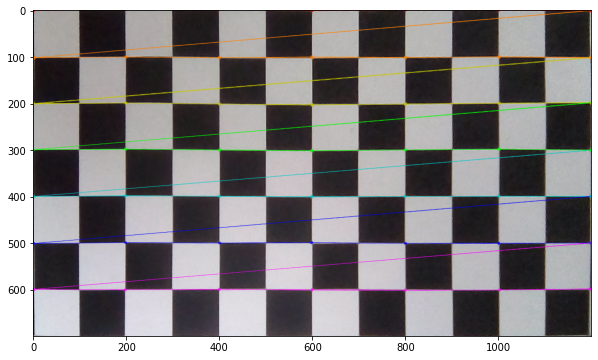

In [ ]:
srcp = []
dstp = []
for i in range(7):
    for j in range(7):
        srcp.append(corners2[i*7+j][0])
        dstp.append([200.0*j,100.0*i])
M = cv2.findHomography(np.asarray(srcp),np.asarray(dstp))
dst = cv2.warpPerspective(color,M[0],(1200,700))
showColor(dst)

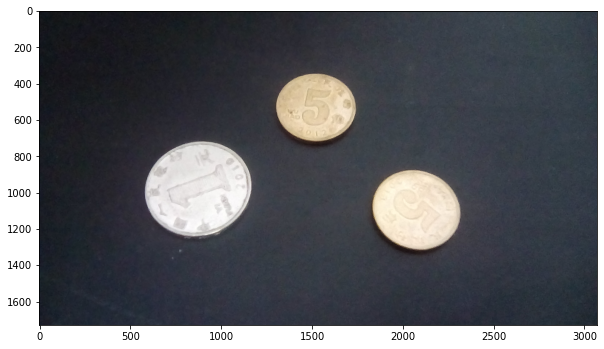

In [ ]:
coin = cv2.imread("/work/uoogou/coin_1_d45.jpg", cv2.IMREAD_COLOR)
showColor(coin)

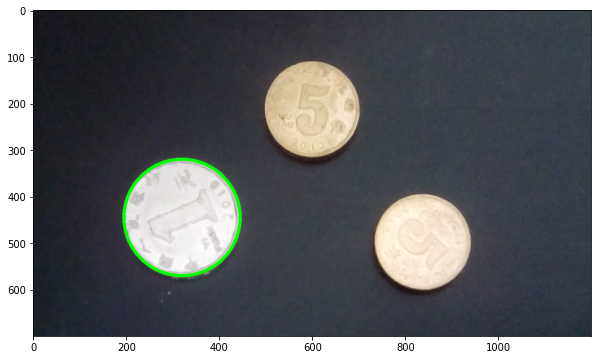

In [ ]:
dst = cv2.warpPerspective(coin,M[0],(1200,700))
cv2.circle(dst, (320, 445), 125, (0, 255, 0), 5)
showColor(dst)

In [ ]:
import numpy as np
objp = np.zeros((11*7,3), np.float32)
objp[:,:2] = np.mgrid[0:11,0:7].T.reshape(-1,2)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], img2.shape[::-1], None, None)
ret

0.44145740525972527

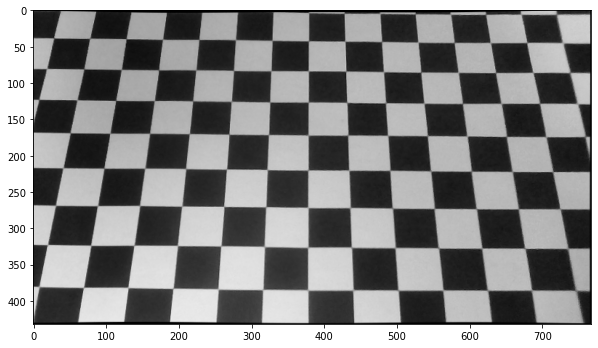

In [ ]:
h, w = img2.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv2.undistort(img2, mtx, dist, None, newcameramtx)
showGray(dst)

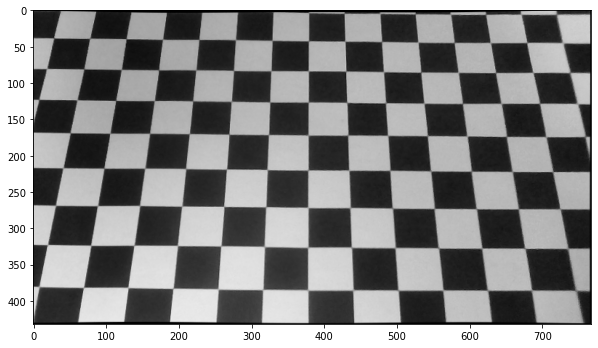

In [ ]:
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv2.remap(img2, mapx, mapy, cv2.INTER_LINEAR)
showGray(dst)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26e5d5b4-a604-4f7b-aef4-7756f8127ef0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>